# Practice visualizing data

In [49]:
#importing

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy.ma as ma
from PIL import Image


#custom
import sys 
sys.path.insert(1, 'C:/Users/boibr/OneDrive/Documents/GitHub/MaNGA-VelMap/')
from GenerateCutout import get_cutout


In [61]:
DATA_FOLDER = "/Users/Emlilio/School/Internships/UR ASTRO/Data/" #create a variable for directory to common folder


In [62]:
test_galaxy = '8998-12705'
cube_fn = DATA_FOLDER + 'MaNGA/manga-'+ test_galaxy +'-MAPS-HYB10-MILESHC-MASTARSSP.fits.gz' #variable for the specific file within data folder


In [63]:

cube = fits.open(cube_fn)                        #file requires opening
stellar_vel = cube['STELLAR_VEL'].data           #for the following we create variable representing data from file HDU's
stellar_vel_ivar = cube['STELLAR_VEL_IVAR'].data 
stellar_mask = cube['STELLAR_VEL_MASK'].data
halpha_vel = cube['EMLINE_GVEL'].data[23]        #the following three have several channels, but were only concerned with the Halpha spectra (channel 23)
halpha_gvel_ivar = cube['EMLINE_GVEL_IVAR'].data[23]
halpha_gvel_mask = cube['EMLINE_GVEL_MASK'].data[23]
flux = cube['SPX_MFLUX'].data

cube.close()


In [64]:
drpall = DATA_FOLDER + 'drpall_ttype_R90.fits'           #access folder with ttype data
drpalltt = Table.read(drpall, format="fits",hdu=1)   #create and visualize table for quick reference
drpalltt [:5]


plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64
10001,12701,10001-12701,1-48157,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.371090612,57.5984251446,159.27921887,38.8381829181,133.37109,57.598425,0.0545561,9,8100.81,0,20.0835,41.292,ma079,22,3,9114,134.41357,57.604214,1.10715,1.15321,1.21404,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.69906,2.64546,2.59645,2.54039,2080,0,0,1,plateTargets-1.par,6013,J085329.03+573554.9,127,127,0,0.0392074,0.0193562,0.0264775,0.0386959,0.0429176,0.0193562,0.0264775,0.748562,-999.0,0.665321,0.705378,1.08789,1.19925,-999.0,0.66562,0.705713,203,1350,6,v1_0_1,51226,-999,0.0392074,0.0395926,-16.2982 .. -19.5112,-16.2321 .. -19.5522,275.541 .. 452.944,3068010000.0,2685340000.0,0.417013,69.2463,0.448783 .. 0.0800664,5.16633,3.63987,12.7947 .. 413.049,3.26768 .. 0.000422625,13.8306 .. 425.941,3.03694 .. 0.00496838,0.335333,0.741845,68.2584,5.29184,14.8124 .. 412.19,2.50888 .. 0.0150605,6.564641952514648,9.852487564086914
10001,12702,10001-12702,1-48188,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,133.685669869,57.4802503218,159.390126911,39.0253440844,133.68567,57.48025,0.0492053,9,8100.81,0,20.0835,41.292,ma078,25,3,9114,134.41357,57.604214,1.10569,1.15089,1.21106,1.78219,1.85994,2.12685,0.898721,0.929654,0.937466,57372,57373,57373,2.72072,2.66314,2.64652,2.61686,2080,0,0,1,plateTargets-1.par,6013,J085444.56+572848.8,127,217,0,0.0408108,0.0193227,0.0264533,0.0386469,0.042869,0.0188554,0.0266531,0.794785,-999.0,0.651037,0.681893,1.04947,1.13205,-999.0,0.631507,0.660498,35,3600,5,v1_0_1,51261,-999,0.0408108,0.0411932,-15.9069 .. -19.6569,-16.127 .. -19.5493,206.664 .. 49.3569,5341650000.0,4642460000.0,0.598115,12.5169,0.405779 .. 0.072394,7.01311,6.11281,12.4553 .. 396.399,2.27628 .. 0.000372112,12.4406 .. 390.985,2.3517 .. 0.000398299,0.508217,1.44272,12.3759,8.34906,10.1128 .. 432.884,3.38905 .. 0.00964978,4.730921268463135,14.355437278747559
10001,12703,10001-12703,1-55648,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,136.017159969,57.0923291779,159.56459216,40.3368076472,136.01716,57.092329,0.0258626,9,8100.81,0,19.9086,40.7596,ma077,31,3,9114,134.41357,57.604214,1.09975,1.13824,1.19323,1.78219,1.85994,2.

In [65]:
# make dictionary from drpalltt

drpalltt_dict = {}                    #create the dictionary

for i in range(len(drpalltt)):           #loop that repeats for the length of drpalltt file
    plateifu = drpalltt['plateifu'][i]    #variable that holds the plateifu withing drpalltt at i(current row) 
    drpalltt_dict[plateifu] = i            #assigns the plateifu value to the position of i


In [66]:
# extract Ttype and determine if spiral
loc = drpalltt_dict[test_galaxy]   #create variable for the location of desired plateifu

In [67]:
ttype = drpalltt['TType'][loc]     #create variable for the ttype within drpalltt at loc
if ttype > 0:                      #simple if/else statement determing wether the ttype corresponds with spiral or no
    galtype = 'Spiral'
else: 
    galtype = 'non-spiral'

galtype


'Spiral'

max = 192.93459min = -221.75575


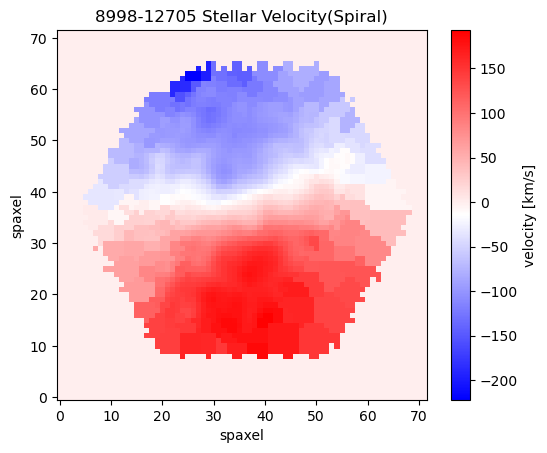

In [68]:
plt.imshow(stellar_vel,cmap = 'bwr')     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+' Stellar Velocity' + '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_Stellar_Velocity.png') #saves the generated figure to initial data folder directory with name and format
val_max = stellar_vel.max()
val_min = stellar_vel.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))




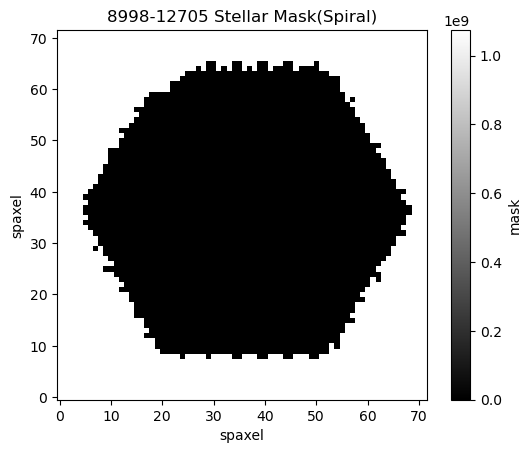

In [69]:
#maps out usefull data points from removed spaxels
plt.imshow(stellar_mask, cmap = 'gist_grey')
plt.colorbar(label = 'mask')
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+ ' Stellar Mask'+ '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_Stellar_Mask.png')

max = 192.93459min = -221.75575
-221.75575


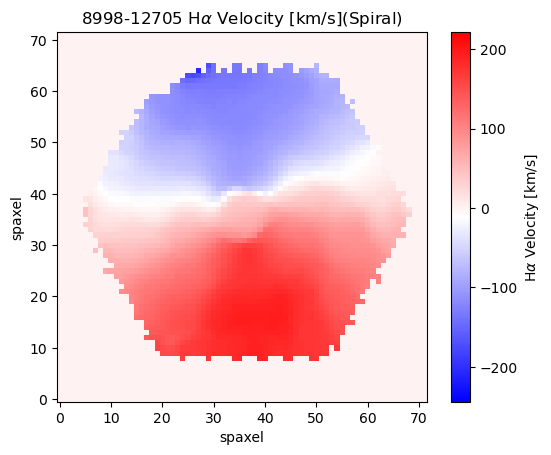

In [70]:
#repeat for H-alpha velocity map
val_max = stellar_vel.max()
val_min = stellar_vel.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = val_min
print(lim)
plt.imshow(halpha_vel,cmap = 'bwr',vmin = -lim,vmax = lim)
plt.colorbar(label = r'H$\alpha$ Velocity [km/s]')
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+r' H$\alpha$ Velocity [km/s]' + '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_H-alpha_Velocity.png')


In [71]:
mhalpha_vel = ma.array(halpha_vel, mask = stellar_mask)

max = 195.43149min = -206.7825
-206.7825


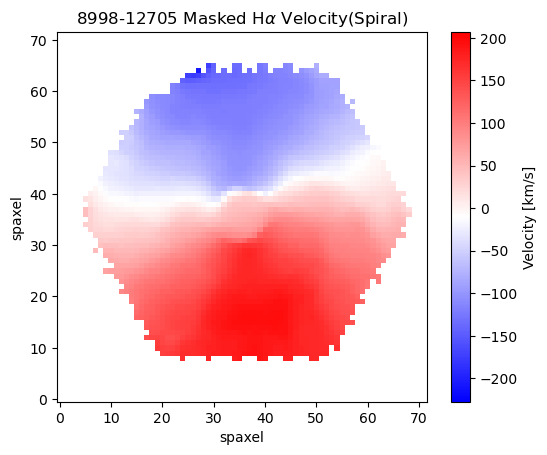

In [72]:
val_max = mhalpha_vel.max()
val_min = mhalpha_vel.min()
print('max = '+ str(val_max) + 'min = ' + str(val_min))

if (val_max >= abs(val_min)):
    lim = val_max
else:
    lim = val_min
print(lim)

plt.imshow(mhalpha_vel,cmap = 'bwr',vmin = -lim,vmax = lim)     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'Velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+r' Masked H$\alpha$ Velocity' + '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_Masked_Halpha_Velocity.png')

In [73]:
mstellar_vel = ma.array(stellar_vel, mask = stellar_mask)

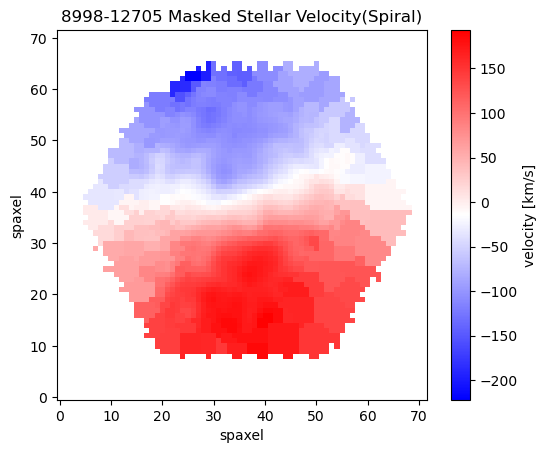

In [74]:
plt.imshow(mstellar_vel,cmap = 'bwr')     #creates a color map of data, (data set, cmap = 'desired color code')
plt.colorbar(label = 'velocity [km/s]')  #following are just labels
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+ ' Masked Stellar Velocity' + '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_Masked_Stellar_Velocity.png')

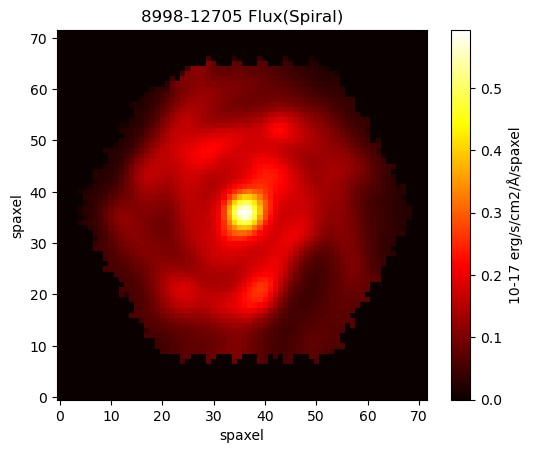

In [75]:
#repeat for flux luminosity map

plt.imshow(flux,cmap = 'hot')
plt.colorbar(label = '10-17 erg/s/cm2/Å/spaxel')
plt.gca().invert_yaxis()
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(test_galaxy+' Flux' + '(' + galtype + ')')
plt.savefig(DATA_FOLDER + 'Plots/'+test_galaxy+'_Flux.png')

In [76]:
drpalltt_dict[test_galaxy]

9085

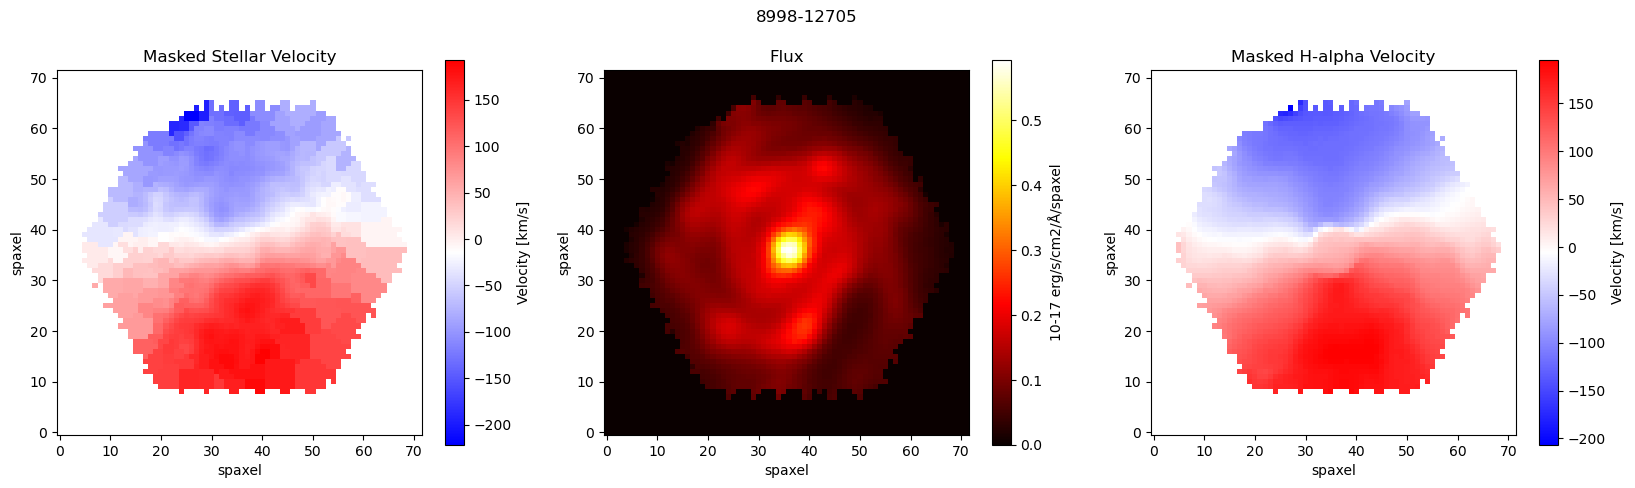

In [77]:
fig,axes = plt.subplots(1,3, figsize=(20,5))
fig.suptitle(test_galaxy)



im = axes[1].imshow(flux, cmap ='hot')
axes[1].set_title('Flux')
axes[1].set_xlabel('spaxel')
axes[1].set_ylabel('spaxel')

axes[1].invert_yaxis()

fig.colorbar(im, ax = axes[1],label = '10-17 erg/s/cm2/Å/spaxel' )



im = axes[0].imshow(mstellar_vel, cmap ='bwr')
axes[0].set_xlabel('spaxel')
axes[0].set_ylabel('spaxel')
axes[0].set_title('Masked Stellar Velocity')
axes[0].invert_yaxis()

fig.colorbar(im, ax = axes[0],label = 'Velocity [km/s]' )


im = axes[2].imshow(mhalpha_vel, cmap ='bwr')
axes[2].set_xlabel('spaxel')
axes[2].set_ylabel('spaxel')
axes[2].set_title('Masked H-alpha Velocity')
axes[2].invert_yaxis()

fig.colorbar(im, ax = axes[2],label = 'Velocity [km/s]' )

In [78]:
index = drpalltt_dict[test_galaxy]
drpalltt[index]

plate,ifudsgn,plateifu,mangaid,versdrp2,versdrp3,verscore,versutil,versprim,platetyp,srvymode,objra,objdec,ifuglon,ifuglat,ifura,ifudec,ebvgal,nexp,exptime,drp3qual,bluesn2,redsn2,harname,frlplug,cartid,designid,cenra,cendec,airmsmin,airmsmed,airmsmax,seemin,seemed,seemax,transmin,transmed,transmax,mjdmin,mjdmed,mjdmax,gfwhm,rfwhm,ifwhm,zfwhm,mngtarg1,mngtarg2,mngtarg3,catidnum,plttarg,manga_tileid,nsa_iauname,ifudesignsize,ifutargetsize,ifudesignwrongsize,z,zmin,zmax,szmin,szmax,ezmin,ezmax,probs,pweight,psweight,psrweight,sweight,srweight,eweight,esweight,esrweight,nsa_field,nsa_run,nsa_camcol,nsa_version,nsa_nsaid,nsa_nsaid_v1b,nsa_z,nsa_zdist,nsa_sersic_absmag,nsa_elpetro_absmag,nsa_elpetro_amivar,nsa_sersic_mass,nsa_elpetro_mass,nsa_elpetro_ba,nsa_elpetro_phi,nsa_extinction,nsa_elpetro_th50_r,nsa_petro_th50,nsa_petro_flux,nsa_petro_flux_ivar,nsa_elpetro_flux,nsa_elpetro_flux_ivar,nsa_sersic_ba,nsa_sersic_n,nsa_sersic_phi,nsa_sersic_th50,nsa_sersic_flux,nsa_sersic_flux_ivar,TType,R90
int64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,bytes53,int64,bytes32,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,bytes32,int64,bytes19,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,bytes6,int64,int64,float64,float64,float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64,float64,float64[7],float64[7],float64[7],float64[7],float64,float64,float64,float64,float64[7],float64[7],float64,float64
8998,12705,8998-12705,1-173641,v3_1_1,v3_1_1,v1_9_1,v5_5_36,v2_9,APOGEE-2&MaNGA,MaNGA dither,163.663838261,47.8622818036,162.725167183,59.2468062995,163.66384,47.862282,0.0219631,9,8100.8,0,30.8614,48.6627,ma144,36,5,9593,164.36243,48.012314,1.03603,1.04593,1.10553,1.47904,1.65108,1.90477,0.943094,0.955243,1.04648,58104,58107,58107,2.69571,2.63982,2.61343,2.58822,1040,0,0,1,plateTargets-1.par,7136,J105439.31+475144.2,127,127,0,0.0728894,0.0447475,0.0837702,0.119834,0.13359,0.0370809,0.134195,0.67973,0.0405977,0.0201556,0.0215158,-999.0,-999.0,0.00885463,0.00947558,0.00976583,227,2964,3,v1_0_1,183502,-999,0.0728894,0.0730603,-18.7253 .. -22.978,-19.0498 .. -22.7244,25.1576 .. 969.125,92887400000.0,64308500000.0,0.864806,163.375,0.184541 .. 0.0329236,9.0877,8.55632,57.7331 .. 2098.92,0.00635368 .. 0.00159145,68.4149 .. 2273.48,0.00660176 .. 0.00172965,0.849331,0.924178,174.377,9.78252,46.3072 .. 2861.31,0.0206049 .. 0.00581692,6.888062953948975,16.67571449279785


In [79]:
ra = drpalltt['objra'][index]
dec = drpalltt['objdec'][index]
r90 = drpalltt['R90'][index]
directory = DATA_FOLDER + 'Plots/Cutouts/'

In [80]:
gal_image, wcs = get_cutout(test_galaxy,ra,dec,r90,directory) 

[None, None]

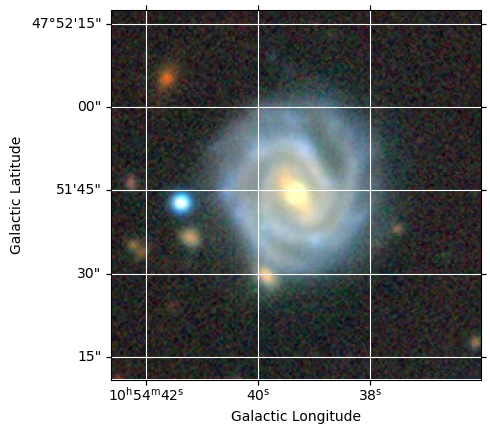

In [81]:
# First, read in image
# data = function_to_read_image(filename=gal_image)
img = np.asarray(Image.open(DATA_FOLDER + 'Plots/Cutouts/'+test_galaxy+'.jpg'))


fig, ax = plt.subplots(subplot_kw=dict(projection=wcs))
ax.imshow(img, origin='lower')
ax.grid(color='white', ls='solid')
ax.set(xlabel='Galactic Longitude', ylabel='Galactic Latitude')

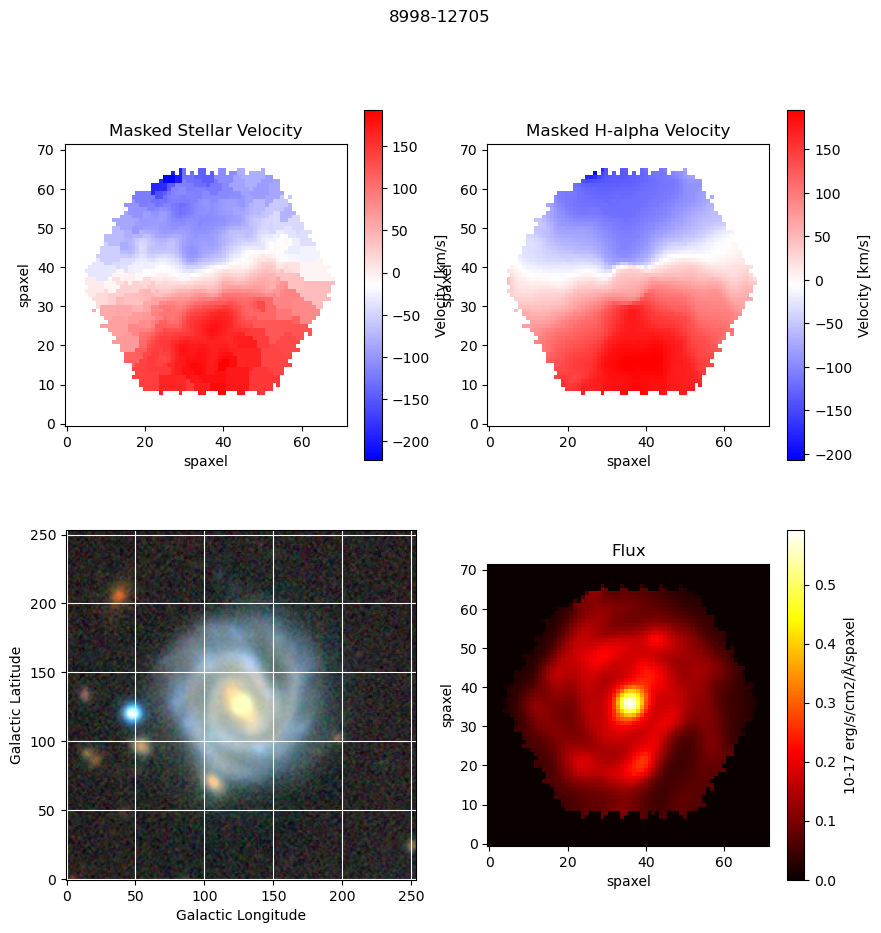

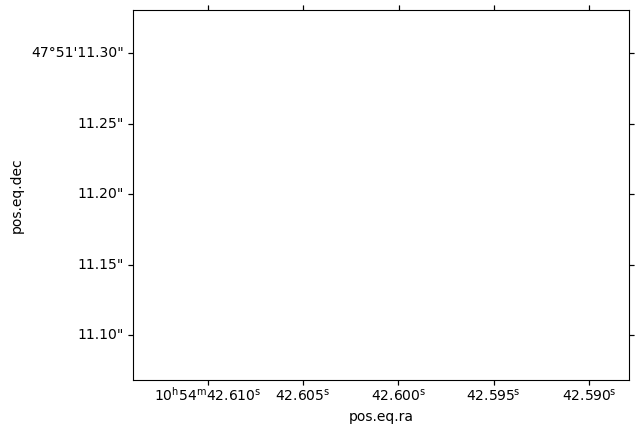

In [107]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
fig.suptitle(test_galaxy)



im = axes[1,1].imshow(flux, cmap ='hot')
axes[1,1].set_title('Flux')
axes[1,1].set_xlabel('spaxel')
axes[1,1].set_ylabel('spaxel')

axes[1,1].invert_yaxis()

fig.colorbar(im, ax = axes[1,1],label = '10-17 erg/s/cm2/Å/spaxel' )



im = axes[0,0].imshow(mstellar_vel, cmap ='bwr')
axes[0,0].set_xlabel('spaxel')
axes[0,0].set_ylabel('spaxel')
axes[0,0].set_title('Masked Stellar Velocity')
axes[0,0].invert_yaxis()

fig.colorbar(im, ax = axes[0,0],label = 'Velocity [km/s]' )


im = axes[0,1].imshow(mhalpha_vel, cmap ='bwr')
axes[0,1].set_xlabel('spaxel')
axes[0,1].set_ylabel('spaxel')
axes[0,1].set_title('Masked H-alpha Velocity')
axes[0,1].invert_yaxis()

fig.colorbar(im, ax = axes[0,1],label = 'Velocity [km/s]' )



im = axes[1,0].imshow(img, origin='lower')
axes[1,0].grid(color='white', ls='solid')
axes[1,0].set(xlabel='Galactic Longitude', ylabel='Galactic Latitude')
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs))
